# Resposta de entrada nula de equações de diferenças

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

## Definição do problema

Aqui, vamos encontrar uma expressão para $y[n]$ que só dependa de $n$, dada uma equação de diferenças linear e invariante no tempo:

$$y[n] + a_{1}y[n-1]+...+a_Ny[n-N] = b_Mx[n-M] +...+b_2x[n-2]+b_1x[n-1] + b_0x[n] $$

## Composição da solução

A solução desta equação é formada por duas partes:

$$y[n] = y_{zi}[n] + y_{zs}[n]$$

em que $y_{zi}[n]$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y[n-1], y[n-2], ..., y[n-N]$ quando $n$ = 0). Para o cálculo dessa componente, considera-se que a entrada $x[n]$ é nula ($zi$ é de *zero input*, **entrada nula** em inglês). Fisicamente falando, a resposta de entrada nula é a resposta devido aos valores armazenados nos elementos de memória (os atrasos nos diagramas de blocos).

A outra componente, $y_{zs}[n]$, é devido à entrada $x[n]$. Para o cálculo dessa componente consideramos que os valores de $y[n-1], y[n-2], ..., y[n-N]$ quando $n$ = 0 são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Aqui, vamos entender como obter a reposta de entrada nula para sistemas discretos lineares e invariantes no tempo. A resposta devido à entrada será abordada em outro momento.

## Resposta de entrada nula de forma recursiva

A primeira maneira é obter a resposta de entrada nula de forma recursiva. Para isso simplesmente ignoramos o sinal de entrada e consideramos apenas as condições iniciais.

---

### Exemplo 1

Vamos analisar a resposta de entrada nula da seguinte equação de diferenças:

$y[n] - 0.5y[n-1] = x[n]$

Com $y[0] = 1$

Resolvendo de forma recursiva, chegamos no seguinte gráfico para a resposta de entrada nula ($x[n]=0$):

<StemContainer object of 3 artists>

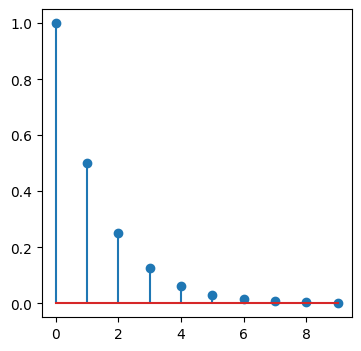

In [ ]:
# @title
plt.figure(figsize=(4,4))
N = 10
y = np.ones(N)
for n in range(1,N):
    y[n] = 0.5*y[n-1]
plt.stem(y)

É possível notar que podemos escrever o sinal $y_{zi}[n]$ como:

$y_{zi}[n] = 0.5^nu[n]$

---

## Resposta de entrada nula obtida pelo polinômio característico

Agora, vamos desenvolver um método para encontrar a expressão de $y_{zi}[n]$ sem ser necessário analisar o gráfico nem obter os valores de $y_{zi}[n]$ de forma recuirsiva.

Temos que achar um sinal que satisfaça a seguinte equação:

$$y_{zi}[n] + a_{1}y_{zi}[n-1]+...+a_Ny_{zi}[n-N] = 0$$

Para que essa soma dê zero, o formato de $y_{zi}[n]$ tem que ser o mesmo desse sinal atrasado. Um sinal que tem esse formato é $c\lambda^n$:

$$c\lambda^{n-M} = c\lambda^{-M}\lambda^{n} = d\lambda^n$$

Portanto, um candidato para a solução da equação é $c\lambda^n$. Substituindo esse sinal na equação acima:

$$c\lambda^n + a_{1}c\lambda^{n-1}+...+a_Nc\lambda^{n-N} = 0$$

Pondo $c$ e $\lambda^n$ em evidência:

$$c\lambda^n\left(1 + a_{1}\lambda^{-1}+...+a_N\lambda^{-N}\right) = 0$$

como $\lambda$ é diferente de 0:

$$1 + a_{1}\lambda^{-1}+...+a_N\lambda^{-N} = 0$$

Multiplicando tudo por $\lambda^N$:

$$\lambda^N + a_{1}\lambda^{N-1}+...+a_N = 0$$

Portanto, o valor de $\lambda$ é a solução do polinômio formado pelos coeficientes da equação de diferenças. Esse polinômio é conhecido como **polinômio característico** da equação de diferenças.  O polinômio acima pode ser decomposto da seguinte forma (Teorema Fundamental da Álgebra):

$$(\lambda-\lambda_1)(\lambda-\lambda_2)(\lambda-\lambda_3)...(\lambda-\lambda_N) = 0 $$

Então, existem $N$ soluções do polinômio. Portanto, $\lambda_i^n$ são soluções da equação de diferenças. A solução geral é uma combinação linear de todas as soluções:

$$y_{zi}[n] = c_1\lambda_1^n + c_2\lambda_2^n + ... + c_N\lambda_N^n $$


A determinação dos valores de $c_i$ é feita a partir das condições iniciais ($y[0], y[-1], ... y[-N+1]$).

### Exemplo 2

Vamos resolver o mesmo exemplo do início do texto com esse método.

A equação é:

$y[n] - 0.5y[n-1] = x[n]$

O polinômio característico da equação é:

$\lambda - 0.5 = 0$

A solução da equação é:

$\lambda_1 = 0.5$

Portanto, a solução de entrada nula é:

$y_{zi}[n] = c0.5^n$ para $n\geq 0$.

Ou,

$y_{zi}[n] = c0.5^nu[n]$

Para saber o valor de $c$, usamos $y[0] = 1$:

$y_{zi}[0] = c0.5^0u[0] = 1 \rightarrow c = 1$

Portanto:

$y_{zi}[n] = 0.5^nu[n]$

A vantagem desse método é que você consegue uma expressão para o sinal de saída e não apenas valores para cada instante (que é o que se obtém quando se resolve a equação de forma recursiva).

### Exemplo 3

Vamos agora obter uma expressão da solução de entrada nula da seguinte equação de diferenças:

$y[n] + 3y[n-1] - 4y[n-2] = 3x[n] + x[n-1]$

com

$y[0] = 1$ e $y[-1] =0.5$

O polinômio característico é:

$\lambda^2 + 3\lambda -4 = 0$

As soluções dessa equação são $\lambda_1 = 1$ e $\lambda_2=-4$. Então a solução da equação de diferenças é:

$y_{zi}[n] = c_1(1)^n + c_2(-4)^n$, para $n\geq 0 $

Utilizando as condições iniciais:

$y_{zi}[0] = 1 = c_1 + c_2$

$y_{zi}[-1] = 0.5 = c_1 + c_2(-0.25)$

Então $c_1=0.6$ e $c_2=0.4$ e:

$y_{zi}[n] = 0.6(1)^n + 0.4(-4)^n$, para $n\geq 0 $

O gráfico das 10 primeiras amostras está abaixo:

<StemContainer object of 3 artists>

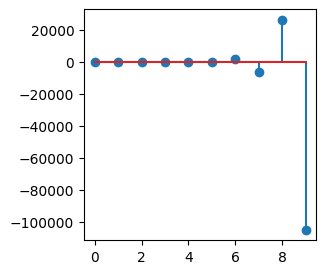

In [ ]:
# @title
N = 10
n = np.arange(N)
yzi = 0.6 + 0.4*(-4)**n
plt.figure(figsize=(3,3))
plt.stem(n, yzi)

Como uma forma de comparação, fazemos o gráfico calculando os valores da resposta de entrada zero de forma recursiva.

<StemContainer object of 3 artists>

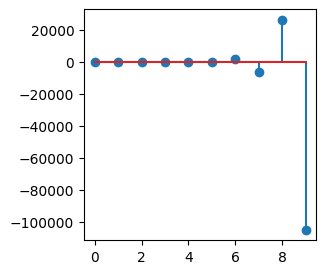

In [ ]:
# @title
plt.figure(figsize=(3,3))
N = 10
y = np.ones(N)
y[-1] = 0.5
for n in range(1,N):
    y[n] = -3*y[n-1] + 4*y[n-2]
plt.stem(y)

## Caso de raízes complexas

No caso de raízes complexas, como a equação de diferenças tem coeficientes reais, elas sempre aparecerão em pares complexos conjugados ($\lambda_1 = \gamma e^{j\omega}$ e $\lambda_2 = \gamma e^{-j\omega}$).

Então, a parte da solução devida a essas raízes é:

$$y_{zi}[n] = c_1\gamma^n e^{j\omega n} + c_2\gamma^n e^{-j\omega n}$$

Como sinal é real, $c_1$ e $c_2$ também serão complexos conjugados:

$c_1 = \frac{c}{2}e^{j\theta}$ e $c_2 = \frac{c}{2}e^{-j\theta}$

Então:

$$y_{zi}[n] = \frac{c}{2}e^{j\theta}\gamma^n e^{j\omega n} + \frac{c}{2}e^{-j\theta}\gamma^n e^{-j\omega n} = \frac{c}{2}\gamma^n e^{j(\omega n+\theta)} + \frac{c}{2}\gamma^n e^{-j(\omega n+\theta)} = c\gamma^n\cos(\omega n+\theta)$$

É importante notar que se o polinômio característico tiver mais raízes reais, elas continuam sendo tratadas da mesma maneira.

### Exemplo 4

Considere um sistema com a seguinte equação de diferenças:

$$y[n] = -2y[n-1] - 2y[n-2] + x[n-1]$$

com $y[0] = 0$ e $y[-1] = -1$

O polinômio característico do sistema é:

$\lambda^2 + 2\lambda + 2 = 0$

As raízes do polinômio são $\lambda_1= -1+j = \sqrt{2}e^{j\frac{3\pi}{4}}$ e $\lambda_2= -1-j = \sqrt{2}e^{j\frac{5\pi}{4}} = \sqrt{2}e^{-j\frac{3\pi}{4}}$.

Então a solução de entrada nula  é:

$$y_{zi}[n] = c_1\sqrt{2}^ne^{j\frac{3\pi n}{4}} +  c_2\sqrt{2}^ne^{-j\frac{3\pi n}{4}} = $$

Usando as condições iniciais, temos:

$$c_1 + c_2 = 0$$

$$c_1\frac{1}{\sqrt{2}}e^{-j\frac{3\pi}{4}} +  c_2\frac{1}{\sqrt{2}}e^{j\frac{3\pi}{4}}=-1$$

Resolvendo o sistema de equações acima chegamos a $c_1 = -j = e^{-j\frac{\pi}{2}}$ e $c_2 = j = e^{j\frac{\pi}{2}}$.

Então, a resposta de entrada nula é:

$y_{zi}[n] = e^{-j\frac{\pi}{2}}\sqrt{2}^ne^{j\frac{3\pi n}{4}} +  e^{j\frac{\pi}{2}}\sqrt{2}^ne^{-j\frac{3\pi n}{4}} = \sqrt{2}^ne^{j\left(\frac{3\pi}{4} n-\frac{\pi}{2}\right)} +  \sqrt{2}^ne^{-j\left(\frac{3\pi n}{4}-\frac{\pi}{2}\right)} =  2\sqrt{2}^n\cos\left(\frac{3\pi n}{4}-\frac{\pi}{2}\right)$

Abaixo é mostrado o gráfico com os 10 primeiros instantes do sinal.

<StemContainer object of 3 artists>

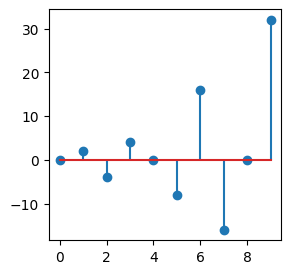

In [ ]:
# @title
plt.figure(figsize=(3,3))
N = 10
n = np.arange(N)
y = 2*np.sqrt(2)**n*np.cos(3*np.pi*n/4-np.pi/2)
plt.stem(y)

E a seguir o mesmo sinal, com os valores obtidos de forma recursiva. Os dois gráficos são iguais.

<StemContainer object of 3 artists>

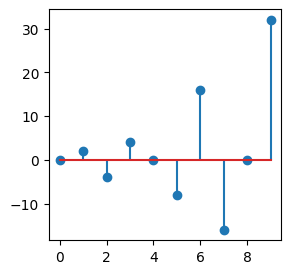

In [ ]:
# @title
plt.figure(figsize=(3,3))
N = 10
y = np.zeros(N)
y[-1] = -1
for n in range(1,N):
    y[n] = -2*y[n-1]  -2 *y[n-2]
plt.stem(y)

## Caso de raízes repetidas

No caso do polinômio característico ter $r$ raízes repetidas $\lambda_1$, as soluções correspondentes seguem a seguinte forma:

$$\lambda_1^n, n\lambda_1^n, n^2\lambda_1^n, ..., n^{r-1}\lambda_1^n$$

Portanto, se o polinômio característico for:

$$(\lambda-\lambda_1)^r(\lambda - \lambda_{r+1})...(\lambda-\lambda_N) = 0$$

A solução de entrada nula tem a seguinte forma:

$$y_{zi}[n] = c_1\lambda_1^n + c_2n\lambda_1^n + c_3n^2\lambda_1^n +... + c_rn^{r-1}\lambda_1^{n} + c_{r+1}\lambda_{r+1}^n + ... + c_N\lambda_N^n$$


### Exemplo 5

Considere um sistema com a seguinte equação de diferenças:

$$y[n] = -4y[n-1] - 4y[n-2] + 3x[n]$$

com $y[0] = 1$ e $y[-1] = 0$

O polinômio característico é:

$\lambda^2 + 4\lambda + 4 = 0$

As raízes da equação são iguais e iguais a -2. Então, a resposta de entrada nula é:

$y_{zi}[n] = c_1(-2)^n + c_2n(-2)^n$

Usando as condições iniciais:

$$c_1 = 1 $$

$$-0.5c_1 +0.5c_2 = 0 \rightarrow c_2 = 1 $$

Então:

$y_{zi}[n] = (-2)^n + n(-2)^n$

### Resumo do procedimento para encontrar a solução de entrada nula de uma equação de diferenças linear e invariante no tempo

- **1** Eliminar os termos referentes ao sinal de entrada

- **2** Encontrar o polinômio característico da equação

- **3** Encontrar as raízes $\lambda_i$ do polinômio característico

- **4** Formar o sinal de resposta nula $y_{zi}[n] = c_1\lambda_1^n + c_2\lambda_2^n + ... + c_N\lambda_N^n$

Caso a raiz $\lambda_1$ seja repetida, a saída terá a forma $y_{zi}[n] = c_1\lambda_1^n + c_2n\lambda_1^n + c_3n^2\lambda_1^n +... + c_rn^{r-1}\lambda_1^{n} + c_{r+1}\lambda_{r+1}^n + ... + c_N\lambda_N^n$

- **5** Encontrar os valores de $c_i$ utilizando as condições iniciais.

- **6** Caso entre as raízes contenham pares complexos conjugados, juntar os termos para formar cossenos.




## Exercícios

**1)** Encontre uma expressão dependendo apenas de $n$ para a solução de entrada nula dos sistemas com as seguintes equações de diferenças:

a) $y[n] = 0.5y[n-1]$, com $y[-1] = 10$

b) $y[n+1] = -2y[n]+ x[n+1]$, com $x[n]= e^{-n}u[n]$ e $y[-1] = 1$

c) $y[n] - 0.6y[n-1]-0.16y[n-2]=0$, com $y[-1]= -25, y[-2]=0$

d) $y[n+2] + 2y[n+1]+0.5y[n] = x[n+2]+x[n+1]+2x[n-3]$, com $x[n] = 2^nu[n], y[0]=3, y[-1]=2$

e) $y[n] = -2y[n-1]-y[n-2] + 2x[n] - x[n-1] $, com $x[n] = 3^{-n}u[n], y[0] = 2, y[-1]=3$

f) $y[n] = -2y[n-1]-2y[n-2] + 2x[n] - x[n-1] $, com $x[n] = 3^{-n}u[n], y[-0] = 2, y[-1]=3$

**2)** A sequência de Fibonacci (0, 1, 1, 2, 3, 5, 8, 13 ...) é uma sequência gerada pela soma dos dois termos anteriores.

a) Encontre uma equação de diferenças para sequência de Fibonacci, considerando que $y[0] = 0$ e $y[1] = 1$.

b) Encontre uma expressão que dependa apenas de $n$ para o enésimo numero da sequência de Fibonacci.

**3)** Encontre uma expressão dependendo apenas de $n$ para a solução de entrada nula dos sistemas com as seguintes equações de diferenças:

a) $y[n] - 5y[n-1]+6y[n-2] = 4x[n]$, com $y[0]=1$,  $y[-1]=-1$ com $x[n]=u[n]$

b) $y[n] = -2y[n-1] + 4x[n]+5x[n-1]$, , com $y[0]=1$,  $y[-1]=1$ com $x[n]=(0.5)^nu[n]$

c) $y[n]=2\cos\left(\frac{\pi}{6}\right)y[n-1] - y[n-2] = x[n]$, com $y[0] = \cos\left(\frac{\pi}{6}\right)$, $y[-1] = \cos\left(\frac{\pi}{3}\right)$ e $x[n]=u[n]$

d) $y[n]=2\cos\left(\Omega_0\right)y[n-1] - y[n-2] = x[n]$, com $y[-1] = \cos\left(\Omega_0\right)$, $y[-2] = \cos\left(2\Omega_0\right)$ e $x[n]=u[n]$



## Referências

- Lathi, BP, Sinais e Sistemas Lineares, 2007

